In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
df = pd.read_csv("/Users/yesimm/Desktop/Final Ödevi/student.csv")


In [25]:
df.head()

,Zaman,Cinsiyet,Yaş,Meslek,Sınıf,Not Ortalaması,Medeni Hal,Depresyon Varmı?,Anksiyete Varmı?,Panik Atak Varmı,Uzmana Başvurdunuzmu?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [26]:
df.shape

(101, 11)

In [27]:
df.dtypes

Zaman                     object
Cinsiyet                  object
Yaş                      float64
Meslek                    object
Sınıf                     object
Not Ortalaması            object
Medeni Hal                object
Depresyon Varmı?          object
Anksiyete Varmı?          object
Panik Atak Varmı          object
Uzmana Başvurdunuzmu?     object
dtype: object

In [28]:
df.nunique()

Zaman                    92
Cinsiyet                  2
Yaş                       7
Meslek                   49
Sınıf                     7
Not Ortalaması            6
Medeni Hal                2
Depresyon Varmı?          2
Anksiyete Varmı?          2
Panik Atak Varmı          2
Uzmana Başvurdunuzmu?     2
dtype: int64

In [29]:
df.isnull().sum()

Zaman                    0
Cinsiyet                 0
Yaş                      1
Meslek                   0
Sınıf                    0
Not Ortalaması           0
Medeni Hal               0
Depresyon Varmı?         0
Anksiyete Varmı?         0
Panik Atak Varmı         0
Uzmana Başvurdunuzmu?    0
dtype: int64

In [30]:
df = df.dropna(how='any',axis=0) 

In [31]:
df.isnull().sum()

Zaman                    0
Cinsiyet                 0
Yaş                      0
Meslek                   0
Sınıf                    0
Not Ortalaması           0
Medeni Hal               0
Depresyon Varmı?         0
Anksiyete Varmı?         0
Panik Atak Varmı         0
Uzmana Başvurdunuzmu?    0
dtype: int64

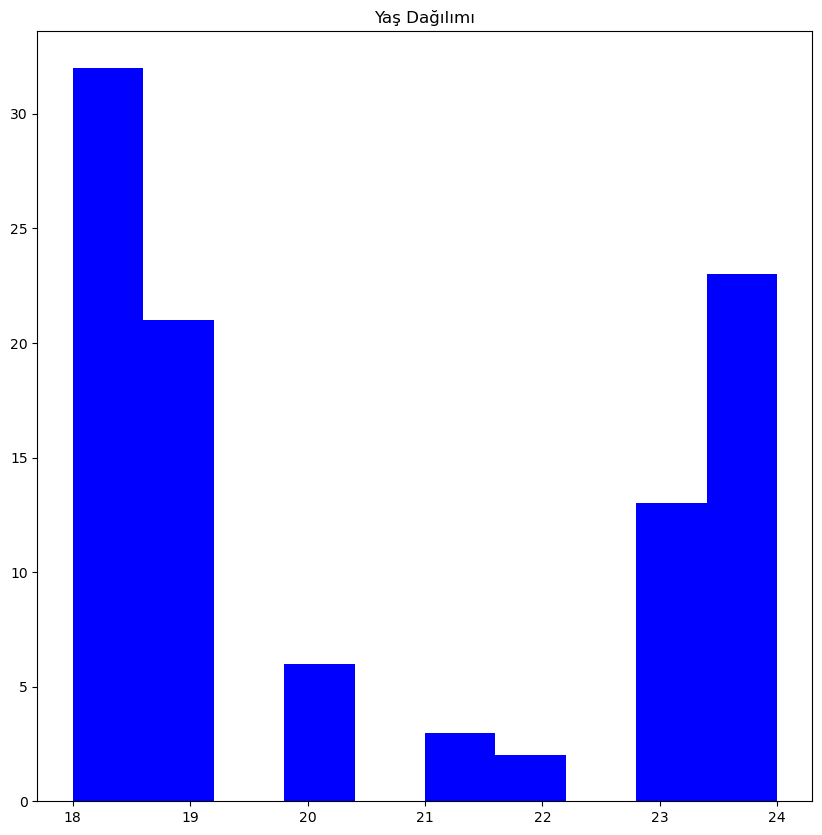

In [20]:
plt.figure(figsize=(10,10))
plt.hist(df['Yaş'],color='b')
plt.title("Yaş Dağılımı");


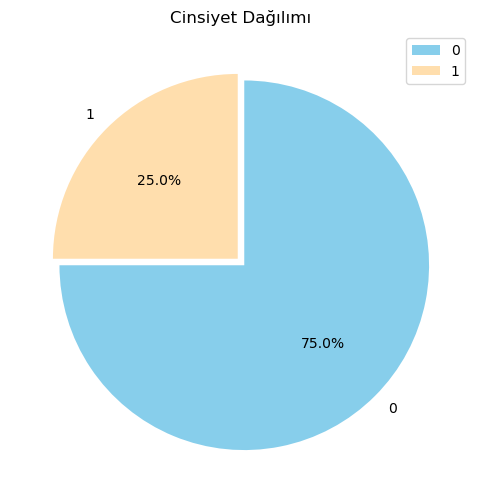

In [21]:
df.rename(columns = {'Cinsiyet': 'Cinsiyet'}, inplace = True)
plt.figure(figsize=(12,6))
plt.title("Cinsiyet Dağılımı")
g = plt.pie(df.Cinsiyet.value_counts(), explode=(0.025,0.025), labels=df.Cinsiyet.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

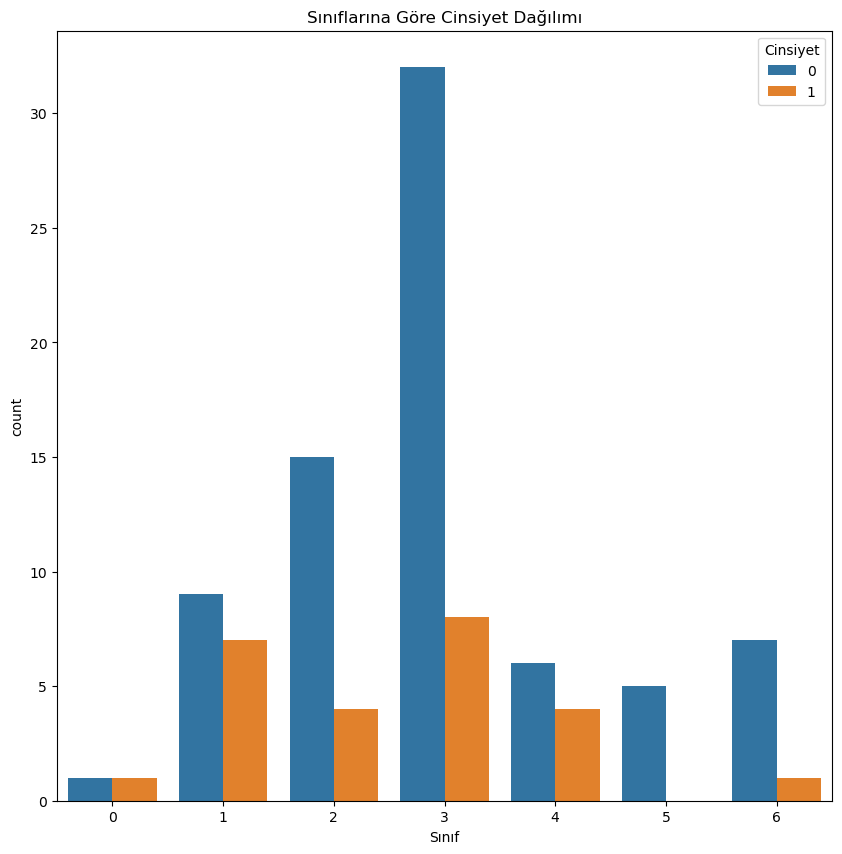

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Sınıf', hue='Cinsiyet')
plt.title("Sınıflarına Göre Cinsiyet Dağılımı")
plt.show()

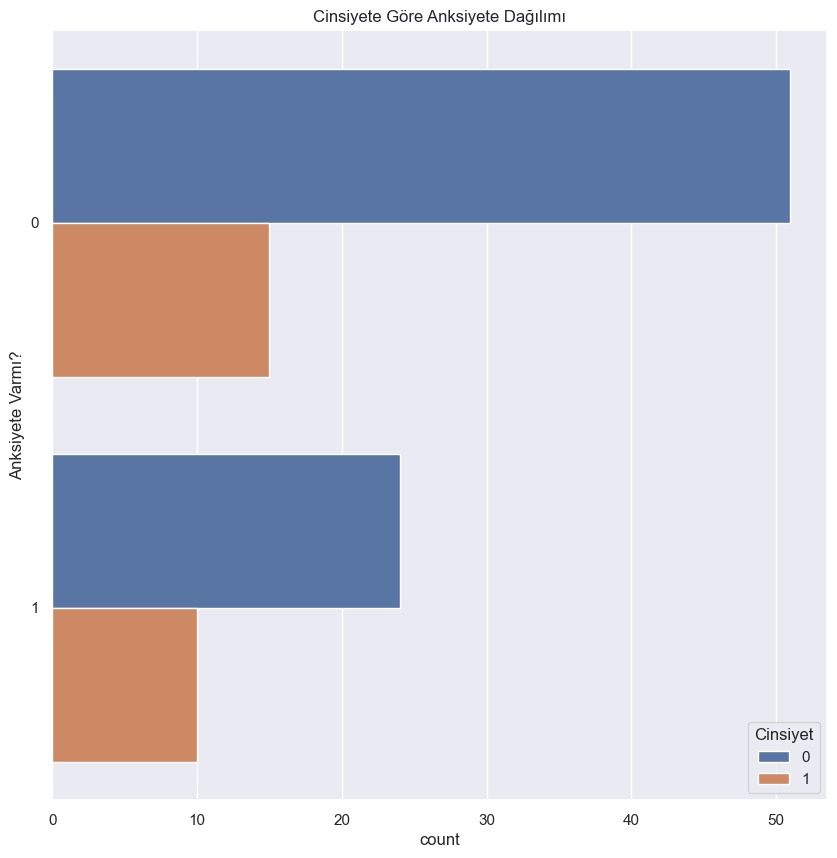

In [38]:

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, y="Anksiyete Varmı?", hue="Cinsiyet")
plt.title("Cinsiyete Göre Anksiyete Dağılımı")
plt.show()


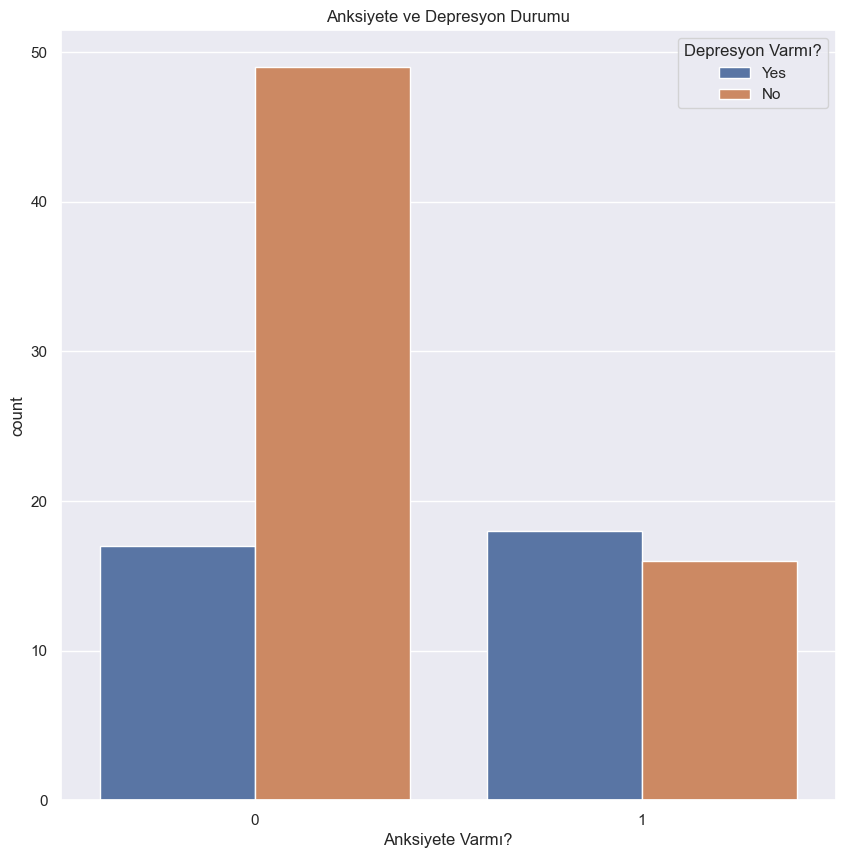

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Anksiyete Varmı?', hue='Depresyon Varmı?')
plt.title("Anksiyete ve Depresyon Durumu")
plt.show()

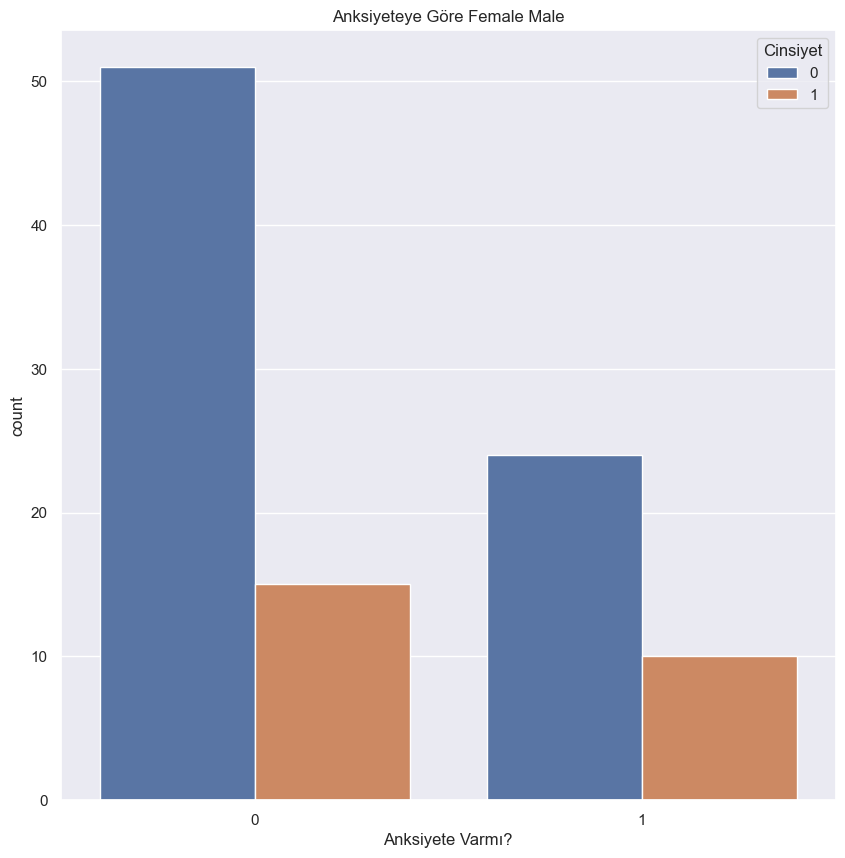

In [41]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot( data=df, x="Anksiyete Varmı?", hue="Cinsiyet")
plt.title("Anksiyeteye Göre Female Male")
plt.show()



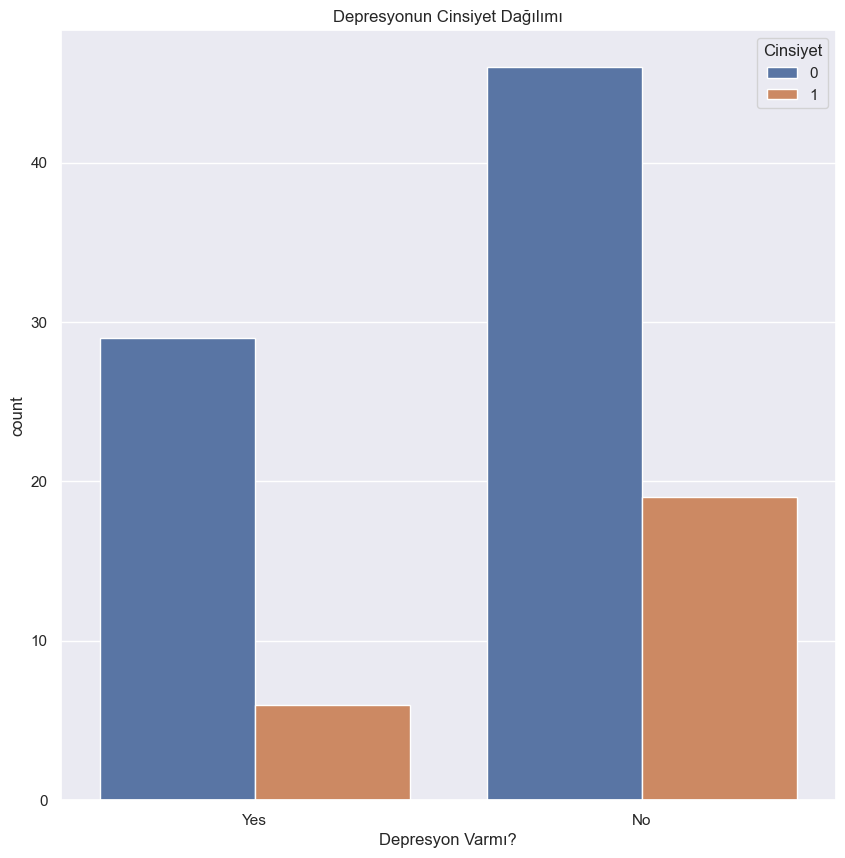

In [42]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="Depresyon Varmı?", hue="Cinsiyet")
plt.title("Depresyonun Cinsiyet Dağılımı")
plt.show()


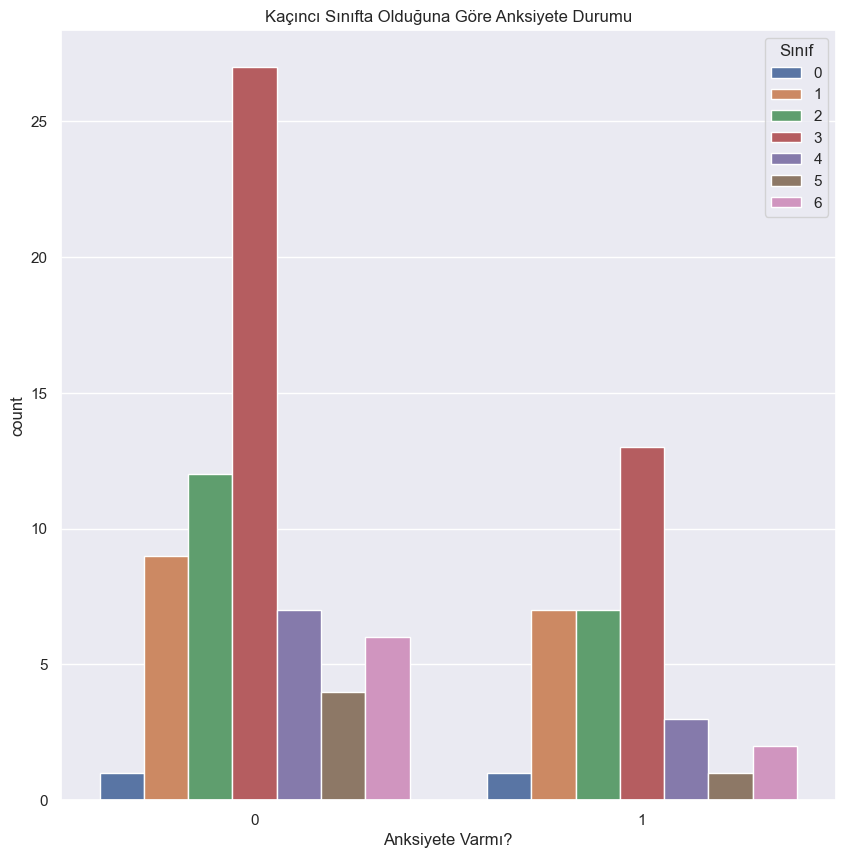

In [43]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Anksiyete Varmı?", hue="Sınıf")
plt.title("Kaçıncı Sınıfta Olduğuna Göre Anksiyete Durumu")
plt.show()


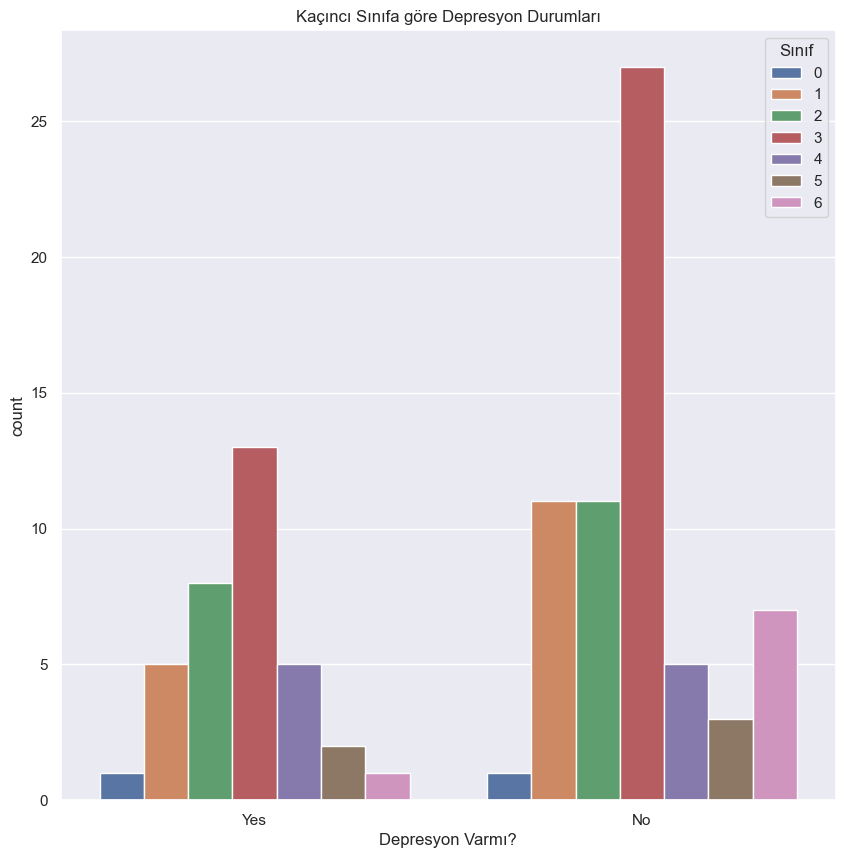

In [44]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="Depresyon Varmı?", hue="Sınıf")
plt.title("Kaçıncı Sınıfa göre Depresyon Durumları")
plt.show()


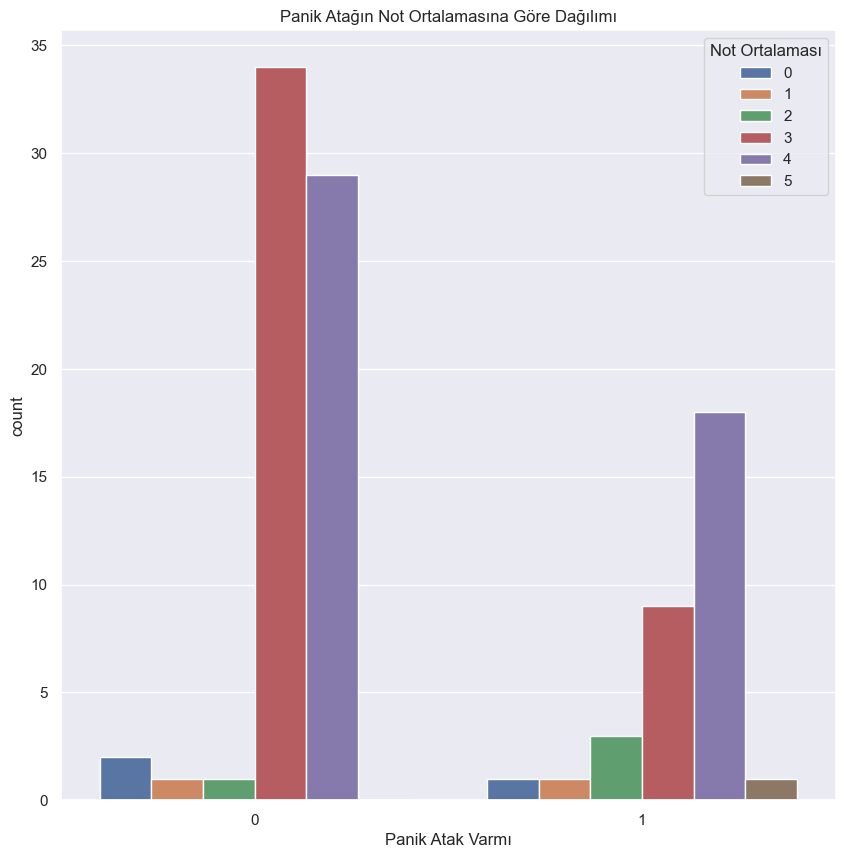

In [47]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Panik Atak Varmı", hue="Not Ortalaması")
plt.title("Panik Atağın Not Ortalamasına Göre Dağılımı")
plt.show()

In [48]:
df.dropna(inplace=True)
label_encoders = {}
categorical_cols = ['Zaman', 'Cinsiyet', 'Meslek', 'Sınıf', 'Not Ortalaması', 'Medeni Hal', 'Anksiyete Varmı?', 'Panik Atak Varmı', 'Uzmana Başvurdunuzmu?']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
X = df.drop(['Depresyon Varmı?'], axis=1)
y = df['Depresyon Varmı?']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)


y_pred = model.predict(X_test_imputed)


print("Eğitim seti doğruluk skoru:", model.score(X_train_imputed, y_train))
print("Test seti doğruluk skoru:", model.score(X_test_imputed, y_test))

Eğitim seti doğruluk skoru: 1.0
Test seti doğruluk skoru: 0.75
